In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_differential_filter(im):
    # To do
    kernel_x = np.tile(np.array([1,0,-1]),(3,1))
    kernel_y = np.tile(np.vstack(np.array([1,0,-1])),3)
    im = im.astype('float') / 255.0
    im_zero_pad = np.pad(im, ((1,1),(1,1)), 'constant')
    #print(kernel_y)
    filter_x = np.zeros(im.shape)
    filter_y = np.zeros(im.shape)
    
    height,width = im_zero_pad.shape
    
    
    for i in range(1,height-1,1):
        for j in range(1,width-1,1):
            cell = np.array([[im_zero_pad[i-1,j-1],im_zero_pad[i-1,j],im_zero_pad[i-1,j+1]],
                            [im_zero_pad[i,j-1],im_zero_pad[i,j],im_zero_pad[i,j+1]],
                            [im_zero_pad[i+1,j-1],im_zero_pad[i+1,j],im_zero_pad[i+1,j+1]]])
        
            
            filter_x[i-1,j-1] = np.sum(cell*kernel_x)
            filter_y[i-1,j-1] = np.sum(cell*kernel_y)
    
    
    return filter_x, filter_y

In [3]:
im = cv2.imread('einstein.jpg', 0)
filter_x, filter_y = get_differential_filter(im)

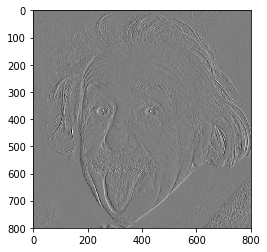

In [4]:
plt.imshow(filter_x,cmap='gray')
plt.show()

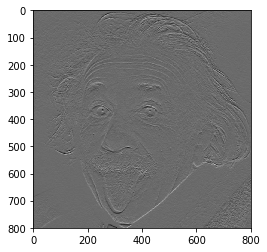

In [5]:
plt.imshow(filter_y,cmap='gray')
plt.show()

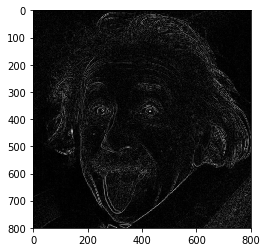

In [6]:
grad_mag = np.sqrt(filter_x*filter_x+filter_y*filter_y)

plt.imshow(grad_mag,cmap='gray')
plt.show()

3.141592653589793


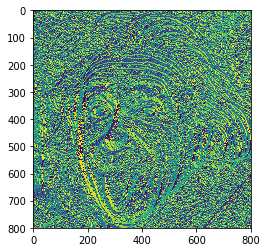

In [7]:
grad_angle = np.zeros(filter_x.shape)
for i in range(filter_x.shape[0]):
    for j in range(filter_x.shape[1]):
        grad_angle[i,j] = np.arctan2(filter_y[i,j],filter_x[i,j])



print(np.max(grad_angle))
#plt.imshow(grad_angle,cmap='gray')
plt.imshow(grad_angle)
plt.show()

In [8]:
print(np.min(grad_angle))

-3.141592653589793


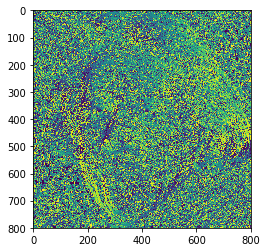

0.0


In [18]:
grad_angle_new = grad_angle % np.pi 
plt.imshow(grad_angle_new)
plt.show()

print(np.min(grad_angle_new))

In [58]:
angle_im = grad_angle_new*180/np.pi

angle_im[np.where(angle_im==180.0)] = 179.9

oder_im = (angle_im // 15)%11

for i in range(6):
    oder_im[np.where(np.logical_and(oder_im>=2*i-1, oder_im<2*i+1))] = i


print(oder_im[:14,:14])





[[2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [0. 3. 4. 5. 4. 2. 2. 1. 1. 2. 4. 5. 5. 4.]
 [0. 3. 4. 5. 4. 2. 1. 1. 1. 1. 4. 5. 5. 4.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 3. 2. 1. 0. 1. 1. 0. 0. 5. 1. 0. 0. 0.]
 [0. 4. 2. 0. 4. 1. 1. 1. 2. 2. 4. 5. 5. 4.]
 [0. 5. 5. 4. 3. 1. 1. 2. 3. 2. 4. 5. 5. 4.]
 [0. 4. 0. 3. 0. 0. 0. 4. 3. 4. 3. 0. 5. 3.]
 [0. 4. 5. 2. 5. 5. 5. 3. 3. 5. 0. 4. 3. 3.]
 [0. 5. 5. 5. 4. 5. 5. 3. 3. 0. 1. 3. 3. 2.]
 [0. 3. 4. 5. 0. 5. 5. 4. 4. 0. 0. 1. 0. 2.]
 [0. 1. 5. 5. 0. 5. 0. 1. 2. 2. 2. 3. 5. 0.]
 [0. 0. 0. 0. 5. 2. 0. 0. 1. 1. 2. 5. 0. 1.]
 [0. 5. 1. 0. 5. 3. 1. 0. 5. 4. 3. 2. 2. 2.]]


In [65]:
for i in range(0,10,2):
    print(i)

0
2
4
6
8


In [53]:
a = np.array([1,2,3,4,2,1,1,2])
a[np.where(np.logical_and(a>=2, a<4))] = 6
print(a)

[1 6 6 4 6 1 1 6]


In [35]:
12.0//11

1.0

In [36]:
zx

NameError: name 'zx' is not defined

In [ ]:
im = cv2.imread('einstein.jpg', 0)
kernel_x = np.tile(np.array([1,0,-1]),(3,1))
kernel_y = np.tile(np.vstack(np.array([1,0,-1])),3)
im = im.astype('float') / 255.0
im_zero_pad = np.pad(im, ((1,1),(1,1)), 'constant')
#print(kernel_y)
filter_x = np.zeros(im.shape)
filter_y = np.zeros(im.shape)

height,width = im_zero_pad.shape


for i in range(1,height-1,1):
    for j in range(1,width-1,1):
        cell = np.array([[im_zero_pad[i-1,j-1],im_zero_pad[i-1,j],im_zero_pad[i-1,j+1]],
                        [im_zero_pad[i,j-1],im_zero_pad[i,j],im_zero_pad[i,j+1]],
                        [im_zero_pad[i+1,j-1],im_zero_pad[i+1,j],im_zero_pad[i+1,j+1]]])
        
        
        filter_x[i-1,j-1] = np.sum(cell*kernel_x)
        filter_y[i-1,j-1] = np.sum(cell*kernel_y)

In [28]:
print(cell*kernel_x)
print(np.sum(cell*kernel_x))
print(kernel_x)
print(cell)


[[ 0.          0.         -0.        ]
 [ 0.          0.         -0.20392157]
 [ 0.          0.         -0.21568627]]
-0.4196078431372549
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
[[0.         0.         0.        ]
 [0.         0.2        0.20392157]
 [0.         0.21568627 0.21568627]]


In [20]:
print(cell)
a = np.array([1,2,3,4,5,6,7])
a[1:4]

[[0.         0.         0.        ]
 [0.         0.2        0.20392157]
 [0.         0.21568627 0.21568627]]


array([2, 3, 4])